In [31]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
# BETA-тестировании, torchvision 0.16
from torchvision.transforms import v2
#############
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json


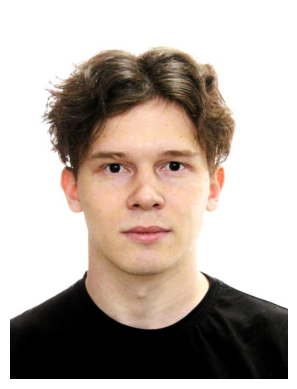

In [ ]:
plt.axis('off')
plt.imshow(Image.open('C:/Users/1/OneDrive - НИТУ МИСиС/Рисунки/Илья.jpg'))

In [6]:
img = np.array(Image.open('C:/Users/1/OneDrive - НИТУ МИСиС/Рисунки/Илья.jpg'))
print(type(img))
print(img.shape)
print(img.dtype)
print(f"min = {img.min()}, max = {img.max()}")

<class 'numpy.ndarray'>
(945, 709, 3)
uint8
min = 0, max = 255


In [7]:
# преобразование изображения при помощи transforms

transform = transforms.ToTensor()
img_totensor = transform(img)

print(type(img_totensor))
print(img_totensor.shape)
print(img_totensor.dtype)
print(f"min = {img_totensor.min()}, max = {img_totensor.max()}")

<class 'torch.Tensor'>
torch.Size([3, 945, 709])
torch.float32
min = 0.0, max = 1.0


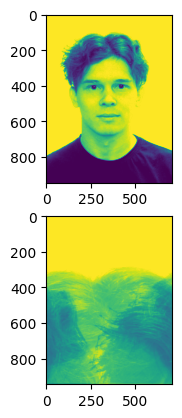

In [24]:
# пример ошибки с решейпом

img_c2 = img
img_c0 = img.reshape([3, 945, 709])

_,ax =plt.subplots(2,1)

ax[0].imshow(img_c2[..., 0])
ax[1].imshow(img_c0[0, ...])

In [26]:
# Нормализация данных

transform = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

img_norm = transform(img_totensor)


print(type(img_norm))
print(img_norm.shape)
print(img_norm.dtype)
print(f"min = {img_norm.min()}, max = {img_norm.max()}")

<class 'torch.Tensor'>
torch.Size([3, 945, 709])
torch.float32
min = -1.0, max = 1.0


In [27]:
# последовательное применение трансформаций

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(img)

print(type(img))
print(img.shape)
print(img.dtype)
print(f"min = {img.min()}, max = {img.max()}")

<class 'torch.Tensor'>
torch.Size([3, 945, 709])
torch.float32
min = -1.0, max = 1.0


## Преобразования при помощи модуля V2

In [28]:
transform = v2.ToTensor()
img_v2 = transform((Image.open('C:/Users/1/OneDrive - НИТУ МИСиС/Рисунки/Илья.jpg')))

print(type(img_v2))
print(img_v2.shape)
print(img_v2.dtype)
print(f"min = {img_v2.min()}, max = {img_v2.max()}")

<class 'torch.Tensor'>
torch.Size([3, 945, 709])
torch.float32
min = 0.0, max = 1.0


C:\Users\1\AppData\Roaming\Python\Python312\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [29]:
transform = v2.ToImage()
img_v2 = transform((Image.open('C:/Users/1/OneDrive - НИТУ МИСиС/Рисунки/Илья.jpg')))

print(type(img_v2))
print(img_v2.shape)
print(img_v2.dtype)
print(f"min = {img_v2.min()}, max = {img_v2.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 945, 709])
torch.uint8
min = 0, max = 255


In [32]:
# изменение типа данных в v2

transform = v2.ToDtype(torch.float32, scale =True)
img_dtype_v2 = transform(img_v2)

print(type(img_dtype_v2))
print(img_dtype_v2.shape)
print(img_dtype_v2.dtype)
print(f"min = {img_dtype_v2.min()}, max = {img_dtype_v2.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 945, 709])
torch.float32
min = 0.0, max = 1.0


In [35]:
# Нормализация данных в v2

transform = v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
img_norm_v2 = transform(img_dtype_v2)

print(type(img_norm_v2))
print(img_norm_v2.shape)
print(img_norm_v2.dtype)
print(f"min = {img_norm_v2.min()}, max = {img_norm_v2.max()}")


<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 945, 709])
torch.float32
min = -1.0, max = 1.0


In [37]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale =True),
        v2.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ]
)

img = transform(Image.open('C:/Users/1/OneDrive - НИТУ МИСиС/Рисунки/Илья.jpg'))

print(type(img))
print(img.shape)
print(img.dtype)
print(f"min = {img.min()}, max = {img.max()}")

<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 945, 709])
torch.float32
min = -1.0, max = 1.0


## Пример использования для задачи классификации 

In [2]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset

class MNISTDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        self.len_dataset = 0
        self.data_list = []

        for path_dir, dir_list, file_list in os.walk(path):
            if path_dir == path:
                self.classes = sorted(dir_list)
                self.class_to_idx = {
                    cls_name: i for i, cls_name in enumerate(self.classes)
                }
                continue

            # Используем os.path.basename для определения имени класса
            cls = os.path.basename(path_dir)

            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                if cls in self.class_to_idx:
                    self.data_list.append((file_path, self.class_to_idx[cls]))
                else:
                    raise KeyError(f"Class '{cls}' not found in class_to_idx.")

            self.len_dataset += len(file_list)

    def __len__(self):
        return self.len_dataset

    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = Image.open(file_path)

        if self.transform is not None:
            sample = self.transform(sample)

        return sample, target


In [4]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5), std=(0.5))
    ]
)

In [18]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std=(0.5,))
    ]
)

In [19]:
train_data = MNISTDataset('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/training',transform)
test_data = MNISTDataset('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/testing',transform)

In [20]:
img,cls = test_data[2]

print('img:')
print(f'{type(img)}')
print(f'{img.shape}')
print(f'{img.type}')
print(f'min = {img.min()},max = {img.max()}')
print('cls:')
print(f' {cls}')

img:
<class 'torchvision.tv_tensors._image.Image'>
torch.Size([1, 28, 28])
<built-in method type of Image object at 0x000001EFB9961E50>
min = -1.0,max = 1.0
cls:
 0


In [21]:
train_data, val_data = random_split(train_data, [0.8, 0.2])

In [22]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [24]:
imgs,cls = next(iter(train_loader))

print('img:')
print(f'{type(imgs)}')
print(f'{imgs.shape}')
print(f'{imgs.dtype}')

print('cls:')
print(f'{type(cls)}')
print(f'{cls.shape}')
print(f'{cls.dtype}')

img:
<class 'torch.Tensor'>
torch.Size([16, 1, 28, 28])
torch.float32
cls:
<class 'torch.Tensor'>
torch.Size([16])
torch.int64


### Использование класса ImageFolder

In [25]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Grayscale(), #чтобы оставался один цветовой канал как и нужно (если это убрать, будет 3 цветовых канала, хотя по факту один)
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std=(0.5,))
    ]
)

train_data = ImageFolder(root='/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/training',transform=transform)
test_data = ImageFolder(root='/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/testing',transform=transform)

img,cls = test_data[2]

print('img:')
print(f'{type(img)}')
print(f'{img.shape}')
print(f'{img.type}')
print(f'min = {img.min()},max = {img.max()}')
print('cls:')
print(f' {cls}')

img:
<class 'torchvision.tv_tensors._image.Image'>
torch.Size([3, 28, 28])
<built-in method type of Image object at 0x000001EFB9940820>
min = -1.0,max = 1.0
cls:
 0


In [27]:
train_data, val_data = random_split(train_data, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

imgs,cls = next(iter(train_loader))

print('img:')
print(f'{type(imgs)}')
print(f'{imgs.shape}')
print(f'{imgs.dtype}')

print('cls:')
print(f'{type(cls)}')
print(f'{cls.shape}')
print(f'{cls.dtype}')

img:
<class 'torch.Tensor'>
torch.Size([16, 3, 28, 28])
torch.float32
cls:
<class 'torch.Tensor'>
torch.Size([16])
torch.int64


## Пример использования для задачи регрессии 

In [29]:
class DatasetReg(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transforn = transform

        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')

        self.len_dataset = len(self.list_name_file)

        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)

    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)

        img = Image.open(path_img)
        coords = torch.tensor(self.dict_coords[name_file], dtype=torch.float32)

        if self.transforn is not None:
            img = self.transforn(img)

        return img, coords
    

In [33]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std=(0.5,))
    ]
)

dataset = DatasetReg('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/dataset', transform=transform)

img, coord = dataset[2]
print('img:')
print(f'{type(img)}')
print(f'{img.shape}')
print(f'{img.dtype}')
print(f'min = {img.min()},max = {img.max()}')

print('coord:')
print(f'{type(coord)}')
print(f'{coord.shape}')
print(f'{coord.dtype}')

img:
<class 'torchvision.tv_tensors._image.Image'>
torch.Size([1, 64, 64])
torch.float32
min = -1.0,max = 0.6627452373504639
coord:
<class 'torch.Tensor'>
torch.Size([2])
torch.float32


In [35]:
train_set, val_set, test_set = random_split(dataset, [0.7, 0.1, 0.2])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

imgs,coords = next(iter(train_loader))

print('img:')
print(f'{type(imgs)}')
print(f'{imgs.shape}')
print(f'{imgs.dtype}')

print('coord:')
print(f'{type(coords)}')
print(f'{coords.shape}')
print(f'{coords.dtype}')

img:
<class 'torch.Tensor'>
torch.Size([32, 1, 64, 64])
torch.float32
coord:
<class 'torch.Tensor'>
torch.Size([32, 2])
torch.float32


# Создание собственного класса трансформаций

In [36]:
class Mytransform(torch.nn.Module):
    def forward(self, sample):
        pass

In [37]:
class MyNormalize(torch.nn.Module):
    def __init__(self, mean, std):
        super().__init__()
        self.mean = mean
        self.std = std

    def forward(self, sample):
        sample = (sample -self.mean)/self.std

        return sample

In [ ]:
# Другая реализация собственного класса

class MyNormalize(torch.nn.Module):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, sample):
        sample = (sample -self.mean)/self.std

        return sample


In [39]:
transform_1 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5), std=(0.5))
    ]
)

transform_2 = transforms.Compose(
    [
        transforms.ToTensor(),
        MyNormalize(0.5, 0.5),
    ]
)

In [40]:
img = Image.open('C:/Users/1/OneDrive - НИТУ МИСиС/Рисунки/Илья.jpg')

In [41]:
img_1 = transform_1(img)


print(type(img_1))
print(img_1.shape)
print(img_1.dtype)
print(f"min = {img_1.min()}, max = {img_1.max()}")

<class 'torch.Tensor'>
torch.Size([3, 945, 709])
torch.float32
min = -1.0, max = 1.0


In [42]:
img_2 = transform_2(img)

print(type(img_2))
print(img_2.shape)
print(img_2.dtype)
print(f"min = {img_2.min()}, max = {img_2.max()}")

<class 'torch.Tensor'>
torch.Size([3, 945, 709])
torch.float32
min = -1.0, max = 1.0


In [43]:
torch.equal(img_1,img_2)

True